<a href="https://colab.research.google.com/github/DarshanChikkahanasoge/Deep-Learning/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-07 18:14:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   313MB/s    in 0.2s    

2022-09-07 18:14:31 (313 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.95.jpg', 'cat.394.jpg', 'cat.998.jpg', 'cat.445.jpg', 'cat.586.jpg', 'cat.552.jpg', 'cat.320.jpg', 'cat.201.jpg', 'cat.720.jpg', 'cat.653.jpg']
['dog.425.jpg', 'dog.235.jpg', 'dog.150.jpg', 'dog.744.jpg', 'dog.109.jpg', 'dog.228.jpg', 'dog.215.jpg', 'dog.23.jpg', 'dog.449.jpg', 'dog.547.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(train_cats_dir )))
print('total training dog images :', len(os.listdir(train_dogs_dir )))

print('total validation cat images :', len(os.listdir( validation_cats_dir )))
print('total validation dog images :', len(os.listdir( validation_dogs_dir )))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

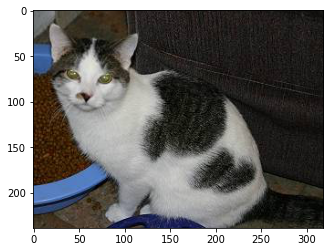

In [ ]:
img=mpimg.imread(os.path.join(train_cats_dir,train_cat_fnames[0]))
plt.imshow(img)

**Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(
          train_generator,
          epochs=15,
          validation_data=validation_generator,
          verbose=2
)

Epoch 1/15
100/100 - 21s - loss: 0.8764 - accuracy: 0.5125 - val_loss: 0.6888 - val_accuracy: 0.6380 - 21s/epoch - 212ms/step
Epoch 2/15
100/100 - 9s - loss: 0.7090 - accuracy: 0.5890 - val_loss: 0.7180 - val_accuracy: 0.5400 - 9s/epoch - 86ms/step
Epoch 3/15
100/100 - 9s - loss: 0.6288 - accuracy: 0.6665 - val_loss: 0.5836 - val_accuracy: 0.7010 - 9s/epoch - 86ms/step
Epoch 4/15
100/100 - 9s - loss: 0.5374 - accuracy: 0.7345 - val_loss: 0.6089 - val_accuracy: 0.6950 - 9s/epoch - 94ms/step
Epoch 5/15
100/100 - 9s - loss: 0.4710 - accuracy: 0.7740 - val_loss: 0.6038 - val_accuracy: 0.7150 - 9s/epoch - 86ms/step
Epoch 6/15
100/100 - 9s - loss: 0.3762 - accuracy: 0.8310 - val_loss: 0.7377 - val_accuracy: 0.7360 - 9s/epoch - 86ms/step
Epoch 7/15
100/100 - 8s - loss: 0.2794 - accuracy: 0.8835 - val_loss: 1.0229 - val_accuracy: 0.7110 - 8s/epoch - 85ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1991 - accuracy: 0.9275 - val_loss: 1.5600 - val_accuracy: 0.6990 - 9s/epoch - 85ms/step
Epoch 9/15
10

Visualizing intermediate layers

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


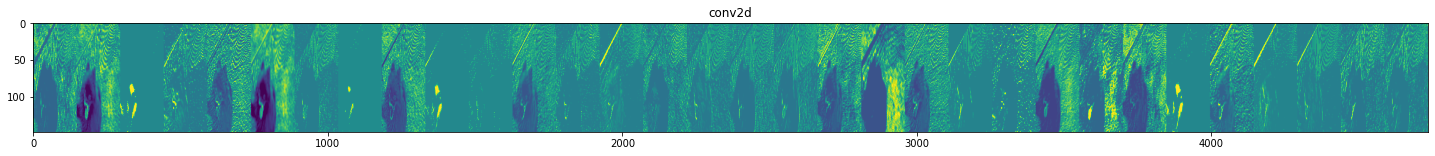

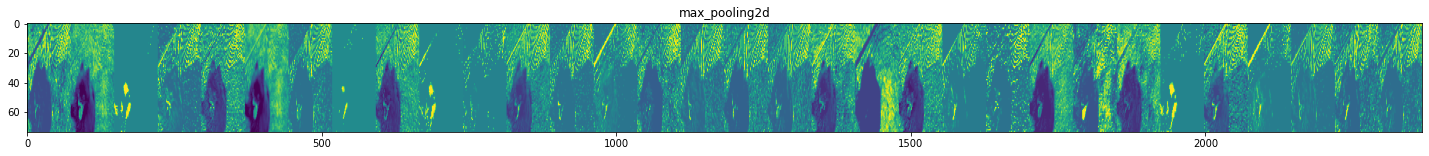

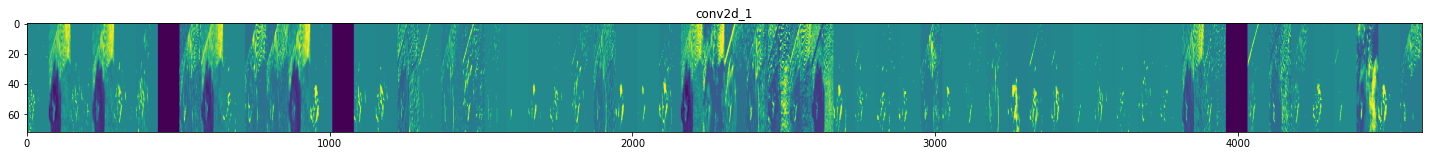

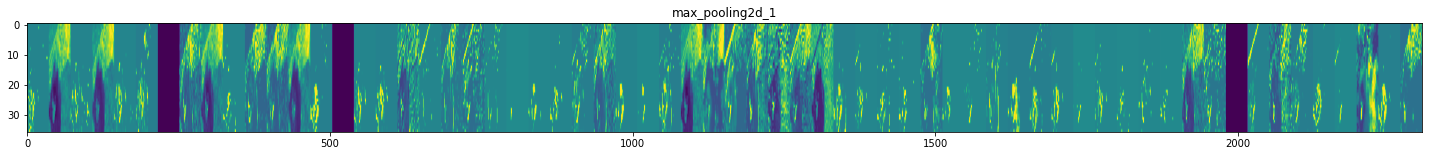

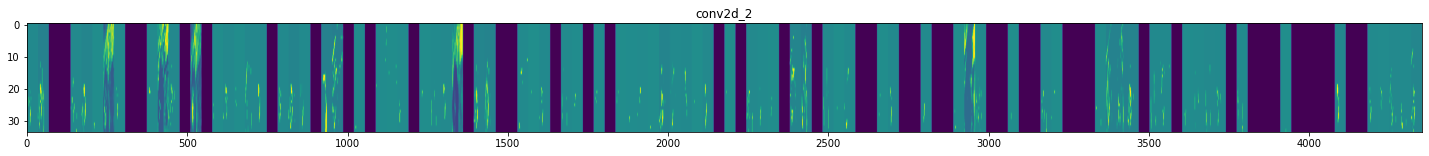

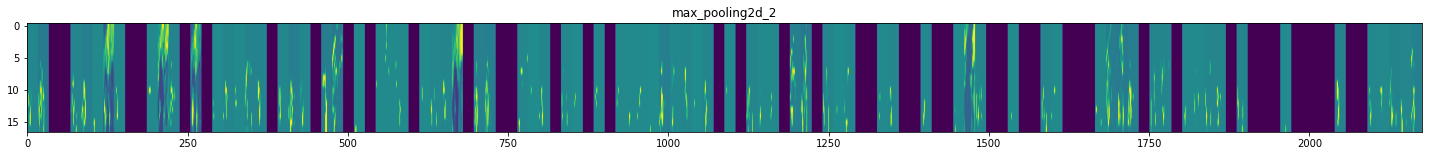

In [ ]:
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)            

x/=255.0
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x


    scale = 20. / n_features
    plt.figure( figsize=(25,2) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


**Evaluating Accuracy and loss for the model**

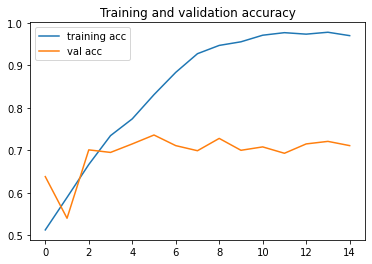

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,label='training acc')
plt.plot(epochs,val_acc,label='val acc')
plt.title('Training and validation accuracy')
plt.legend()


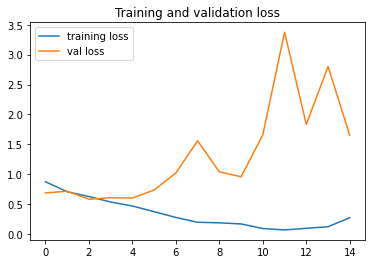

In [ ]:
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='val loss')
plt.title('Training and validation loss')
plt.legend()